# 데이터 전처리 1
1. 한글은 전부 영어로 변환
2. train.csv와 building_info.csv를 건물번호를 기준으로 병합
3. train.csv에서 num_date_time = 건물번호 + 일시, 중복된 데이터이므로 열 제거
4. date_time 을 년, 월, 주, 시간으로 분리

In [1]:
# module import
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('../data/train.csv')
building_info = pd.read_csv('../data/building_info.csv')

In [6]:
# data set check
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [5]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [3]:
# rename kor to eng
train_df = train_df.rename(columns={
    '건물번호': 'building_id',
    '일시': 'date_time',
    '기온(C)': 'temp',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption',
})
train_df.drop('num_date_time', axis=1, inplace=True)
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()

,building_id,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [5]:
train_df = pd.merge(train_df, building_info, on='building_id', how='left')

In [6]:
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-


In [7]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year
train_df.head()

,building_id,date_time,temp,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_cap,ess_cap,pcs_cap,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-,4,1,6,2022


# 데이터 전처리 2
1. 결측치 check
2. outlier check

In [8]:
train_df.isna().sum()

building_id               0
date_time                 0
temp                      0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type             0
total_area                0
cooling_area              0
solar_power_cap           0
ess_cap                   0
pcs_cap                   0
hour                      0
day                       0
month                     0
year                      0
dtype: int64

In [9]:
len(train_df)

204000

In [10]:
print(len(train_df[train_df['solar_power_cap'] == '-']))
print(len(train_df[train_df['ess_cap'] == '-']))
print(len(train_df[train_df['pcs_cap'] == '-']))

130560
193800
193800


## 중간정리 (12/07 04:46)

rainfall, ess_cap, pcs_cap => 전체 데이터양에 비해 결측치가 충분히 많으므로 drop

solar_power_cap, sunshine, solar_radiation => 변수의 특성을 확인하고 보간할 방법이 있는지?

++ 일조/일사량의 경우 결측치 양이 적지 않음. 또한 구름, 공기 중의 입자등과 같은 여러가지 요소가 얽혀있음 = 보간하려해도 부정확할 확률이 높음

windspeed, humidity => 보간, 데이터 특성상 풍속과 습도의 경우 결측된 부분의 전후 데이터의 평균으로 보간할 수 있음 (시간상 전후)

~cap 변수들의 경우 건물에 측정 관련 구조물이 없어서 **-** 로 표시된 것일 수도 있음 => 설치여부를 0과 1로 나타낼까?

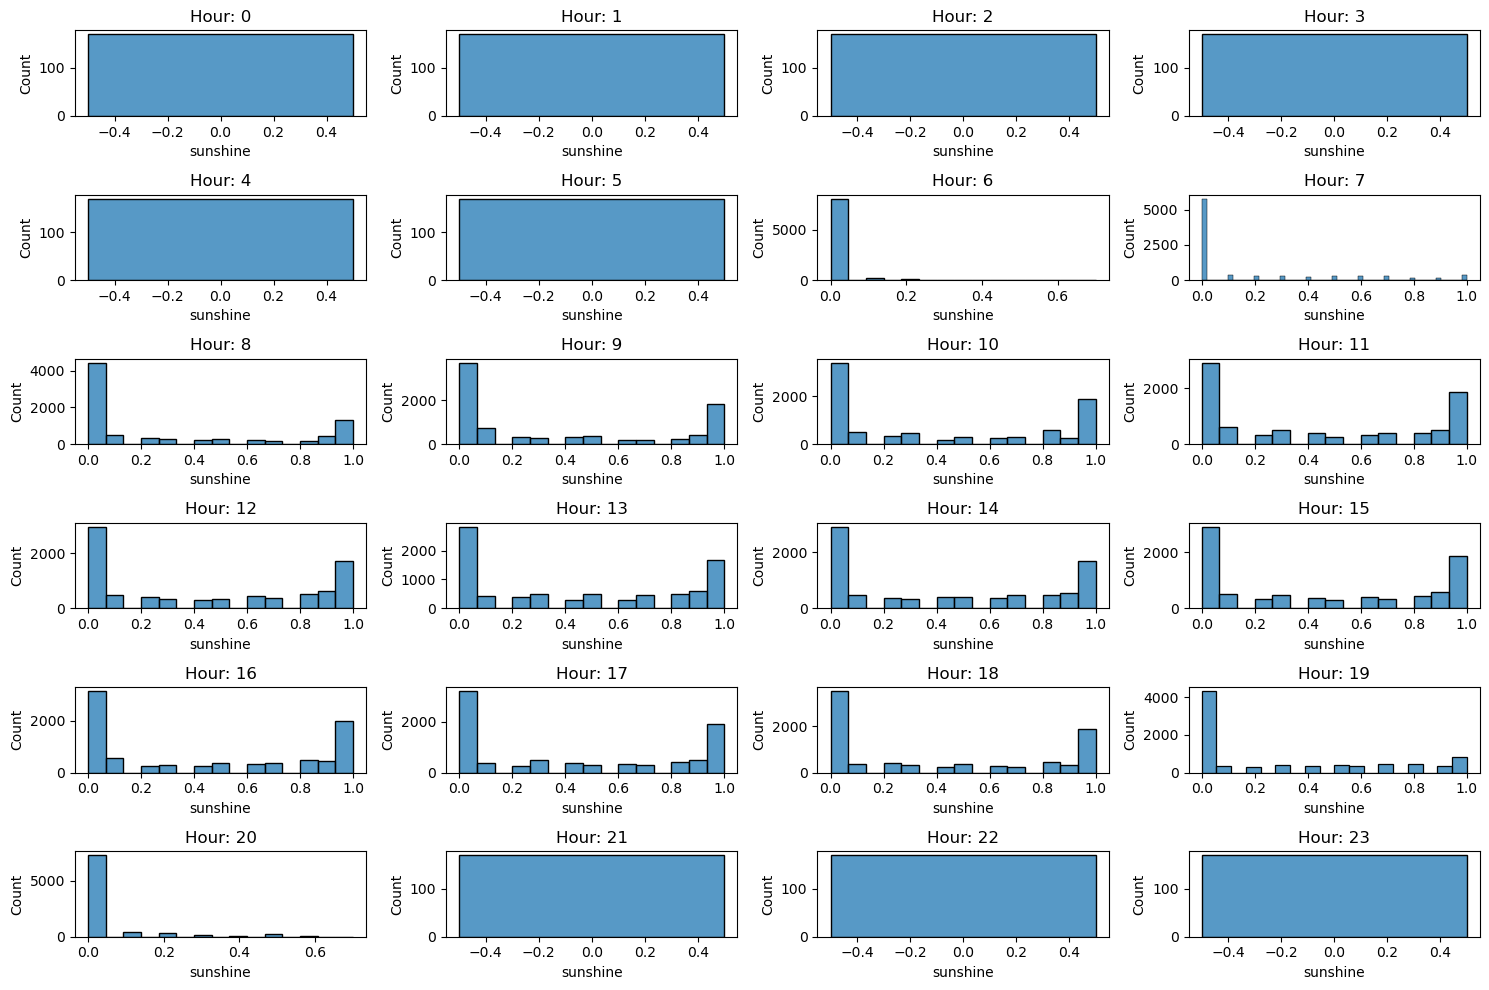

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(24):
    sns.histplot(train_df[train_df.hour == i]['sunshine'], ax=axs[i])
    axs[i].set_title(f'Hour: {i}')

plt.tight_layout()

<Axes: xlabel='rainfall', ylabel='Count'>

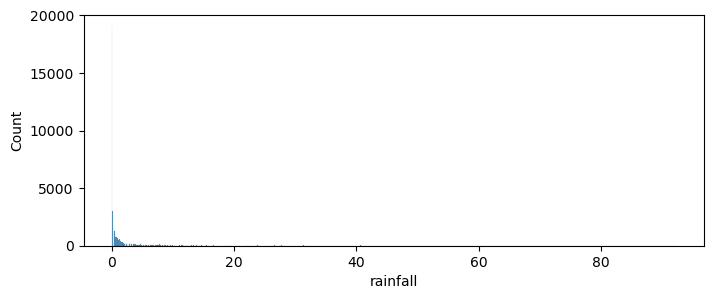

In [37]:
plt.figure(figsize=(8, 3))
sns.histplot(train_df['rainfall'])

sunshin, solar_radiation: 정확하게 보간할 수 있는 방법이 없다고 판단 => drop  
rainfall: 대부분의 데이터가 0임 => .fillna(0)  
solar_power_cap, ess_cap, pcs_cap: 결측치존재 != 측정도구X 라고 판단, 충분히 결측된 데이터가 많으므로 drop

In [39]:
train_df = train_df.drop(['solar_power_cap', 'ess_cap', 'pcs_cap', 'sunshine', 'solar_radiation'], axis=1)

In [47]:
train_df['rainfall'].fillna(0, inplace=True)

In [48]:
train_df.isna().sum()

building_id           0
date_time             0
temp                  0
rainfall              0
windspeed            19
humidity              9
power_consumption     0
building_type         0
total_area            0
cooling_area          0
hour                  0
day                   0
month                 0
year                  0
dtype: int64

windspeed, humidity의 경우 값을 어떻게 보간할까?
=> 근처 값으로 덮기 or 값 평균 뭐가 더 나을지에 대한 고민

<Axes: xlabel='windspeed', ylabel='Count'>

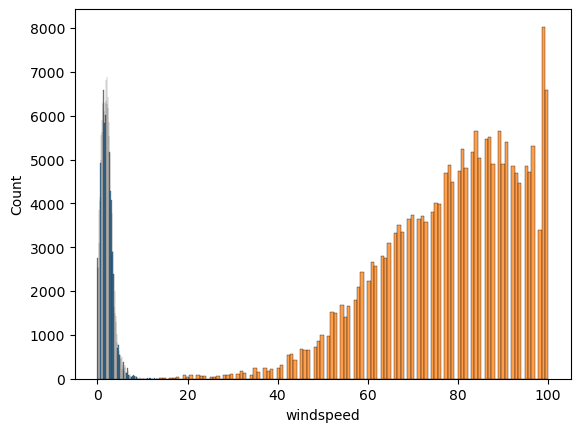

In [46]:
sns.histplot(train_df['windspeed'])
sns.histplot(train_df['humidity'])

In [49]:
train_df['windspeed'].fillna(method='ffill', inplace=True)
train_df['humidity'].fillna(method='ffill', inplace=True)

In [50]:
train_df.isna().sum()

building_id          0
date_time            0
temp                 0
rainfall             0
windspeed            0
humidity             0
power_consumption    0
building_type        0
total_area           0
cooling_area         0
hour                 0
day                  0
month                0
year                 0
dtype: int64

## 결측치 제거 완료 (12/08 05:50)
TODO: remove outlier